In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

In [30]:
features = pd.read_csv('Features data set.csv')
sales = pd.read_csv('sales data-set.csv')
stores = pd.read_csv('stores data-set.csv')

In [31]:
features = features.drop(['IsHoliday'], axis=1)

combined = sales.merge(features, on=['Store', 'Date'])
combined = combined.merge(stores, on=['Store'])

combined.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [32]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [33]:
combined = combined.fillna(value=0)

In [34]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     421570 non-null  float64
 8   MarkDown2     421570 non-null  float64
 9   MarkDown3     421570 non-null  float64
 10  MarkDown4     421570 non-null  float64
 11  MarkDown5     421570 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [35]:
merged_df = combined.groupby(['Store', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
                               'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'], as_index=False).sum()

merged_df = merged_df.drop(['Dept'], axis = 1)
print(merged_df.head())

   Store        Date  IsHoliday  Temperature  Fuel_Price  MarkDown1  \
0      1  01/04/2011      False        59.17       3.524       0.00   
1      1  01/06/2012      False        77.95       3.501    6086.21   
2      1  01/07/2011      False        85.55       3.524       0.00   
3      1  01/10/2010      False        71.89       2.603       0.00   
4      1  02/03/2012      False        60.96       3.630   15441.40   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment Type  \
0        0.0       0.00       0.00       0.00  214.837166         7.682    A   
1       12.0     370.51     148.75    3690.85  221.747214         7.143    A   
2        0.0       0.00       0.00       0.00  215.184137         7.962    A   
3        0.0       0.00       0.00       0.00  211.671989         7.838    A   
4     1569.0      10.80   25390.88    8067.61  220.848045         7.348    A   

     Size  Weekly_Sales  
0  151315    1495064.75  
1  151315    1624477.58  
2  151315    1

In [36]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'], dayfirst=True)
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month

merged_df['WeekOfYear'] = merged_df['Date'].dt.isocalendar().week
merged_df['WeekOfYear'] = merged_df['WeekOfYear'].astype(np.int32)

merged_df['DayOfWeek'] = merged_df['Date'].dt.dayofweek

merged_df = merged_df.sort_values(by=['Store', 'Date'])
print(merged_df.head())

     Store       Date  IsHoliday  Temperature  Fuel_Price  MarkDown1  \
19       1 2010-02-05      False        42.31       2.572        0.0   
52       1 2010-02-12       True        38.51       2.548        0.0   
85       1 2010-02-19      False        39.93       2.514        0.0   
118      1 2010-02-26      False        46.63       2.561        0.0   
20       1 2010-03-05      False        46.50       2.625        0.0   

     MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
19         0.0        0.0        0.0        0.0  211.096358         8.106   
52         0.0        0.0        0.0        0.0  211.242170         8.106   
85         0.0        0.0        0.0        0.0  211.289143         8.106   
118        0.0        0.0        0.0        0.0  211.319643         8.106   
20         0.0        0.0        0.0        0.0  211.350143         8.106   

    Type    Size  Weekly_Sales  Year  Month  WeekOfYear  DayOfWeek  
19     A  151315    1643690.90  201

In [37]:
merged_df['Holiday_Weight'] = 1

super_bowl_week = (merged_df['Date'].dt.month == 2) & (merged_df['Date'].dt.isocalendar().week <= 6) & (merged_df['Date'].dt.dayofweek == 6)
labor_day_week = (merged_df['Date'].dt.month == 9) & (merged_df['Date'].dt.isocalendar().week == 36)
thanksgiving_week = (merged_df['Date'].dt.month == 11) & (merged_df['Date'].dt.isocalendar().week == 47)
christmas_period = (merged_df['Date'].dt.month == 12) & (merged_df['Date'].dt.isocalendar().week <= 24)

merged_df.loc[super_bowl_week, 'Holiday_Weight'] = 5
merged_df.loc[labor_day_week, 'Holiday_Weight'] = 5
merged_df.loc[thanksgiving_week, 'Holiday_Weight'] = 5
merged_df.loc[christmas_period, 'Holiday_Weight'] = 5

merged_df['Weighted_Weekly_Sales'] = merged_df['Weekly_Sales'] * merged_df['Holiday_Weight']

merged_df.head()

,Store,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Unemployment,Type,Size,Weekly_Sales,Year,Month,WeekOfYear,DayOfWeek,Holiday_Weight,Weighted_Weekly_Sales
19,1,2010-02-05,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,8.106,A,151315,1643690.90,2010,2,5,4,1,1643690.90
52,1,2010-02-12,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,...,8.106,A,151315,1641957.44,2010,2,6,4,1,1641957.44
85,1,2010-02-19,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,...,8.106,A,151315,1611968.17,2010,2,7,4,1,1611968.17
118,1,2010-02-26,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,...,8.106,A,151315,1409727.59,2010,2,8,4,1,1409727.59
20,1,2010-03-05,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,...,8.106,A,151315,1554806.68,2010,3,9,4,1,1554806.68


In [ ]:
label_encoder = LabelEncoder()
merged_df['Type'] = label_encoder.fit_transform(merged_df['Type'])
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 19 to 6413
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Store                  6435 non-null   int64         
 1   Date                   6435 non-null   datetime64[ns]
 2   IsHoliday              6435 non-null   bool          
 3   Temperature            6435 non-null   float64       
 4   Fuel_Price             6435 non-null   float64       
 5   MarkDown1              6435 non-null   float64       
 6   MarkDown2              6435 non-null   float64       
 7   MarkDown3              6435 non-null   float64       
 8   MarkDown4              6435 non-null   float64       
 9   MarkDown5              6435 non-null   float64       
 10  CPI                    6435 non-null   float64       
 11  Unemployment           6435 non-null   float64       
 12  Type                   6435 non-null   int64         
 13  Size   

array([2010, 2011, 2012])

Correlation of each feature with Weighted_Weekly_Sales:
Size            0.810468
MarkDown1       0.179107
MarkDown5       0.173273
MarkDown4       0.139195
MarkDown3       0.120289
MarkDown2       0.080157
Month           0.076143
WeekOfYear      0.074211
Fuel_Price      0.009464
Year           -0.018378
Temperature    -0.063810
CPI            -0.072634
Unemployment   -0.106176
Store          -0.335332
Type           -0.598380
DayOfWeek            NaN
dtype: float64


c:\Users\eric\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\eric\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\eric\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


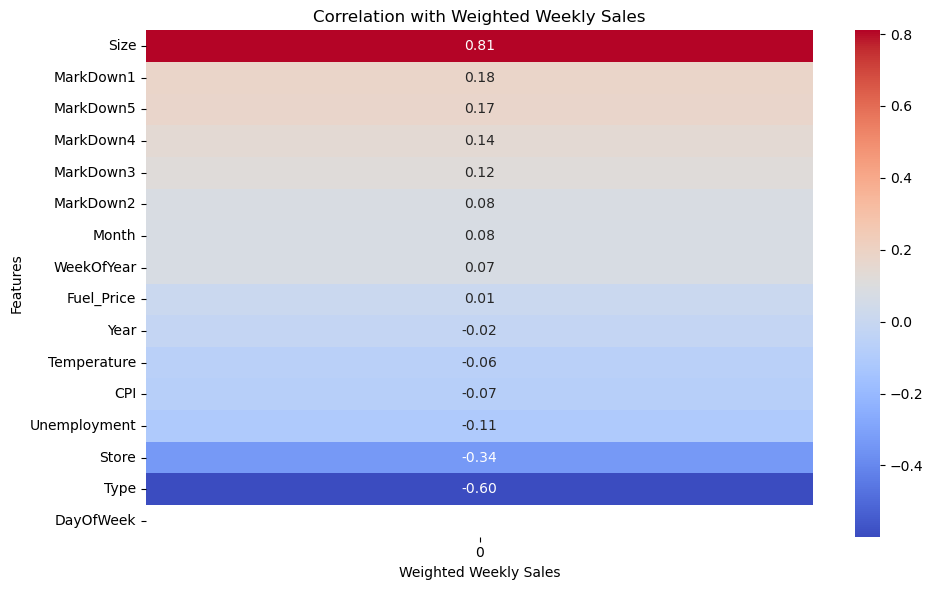

In [ ]:
numeric_df = merged_df.select_dtypes(include=[np.number]).drop(columns=['Weekly_Sales', 'Weighted_Weekly_Sales', 'Holiday_Weight', ])

# Compute correlation matrix
correlation = numeric_df.corrwith(merged_df['Weekly_Sales']).sort_values(ascending=False)

print("Correlation of each feature with Weighted_Weekly_Sales:")
print(correlation)

plt.figure(figsize=(10, 6))

sns.heatmap(correlation.to_frame(), annot=True, cmap="coolwarm", cbar=True, fmt=".2f")

plt.title("Correlation with Weighted Weekly Sales")

plt.xlabel("Weighted Weekly Sales")

plt.ylabel("Features")

plt.tight_layout()

plt.show()

[0.22668357 0.15088926 0.12000742 0.10824811 0.09263525 0.08276386
 0.07737273 0.06482042 0.04500113 0.01876137 0.01281688]


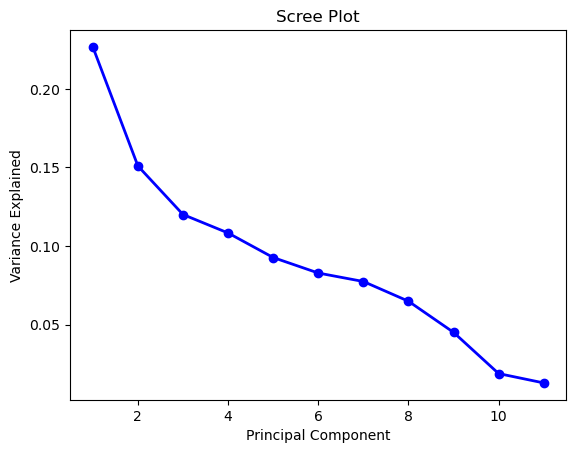

In [40]:
pca = PCA()
scaler = StandardScaler()

#making a copy to preserve the original unscaled df
combined_scaled = merged_df.copy()

#scaling each of the numerical columns
combined_scaled['Weekly_Sales'] = scaler.fit_transform(combined_scaled[['Weekly_Sales']])
combined_scaled['Temperature'] = scaler.fit_transform(combined_scaled[['Temperature']])
combined_scaled['Fuel_Price'] = scaler.fit_transform(combined_scaled[['Fuel_Price']])
combined_scaled['MarkDown1'] = scaler.fit_transform(combined_scaled[['MarkDown1']])
combined_scaled['MarkDown2'] = scaler.fit_transform(combined_scaled[['MarkDown2']])
combined_scaled['MarkDown3'] = scaler.fit_transform(combined_scaled[['MarkDown3']])
combined_scaled['MarkDown4'] = scaler.fit_transform(combined_scaled[['MarkDown4']])
combined_scaled['MarkDown5'] = scaler.fit_transform(combined_scaled[['MarkDown5']])
combined_scaled['CPI'] = scaler.fit_transform(combined_scaled[['CPI']])
combined_scaled['Unemployment'] = scaler.fit_transform(combined_scaled[['Unemployment']])
combined_scaled['Size'] = scaler.fit_transform(combined_scaled[['Size']])
combined_scaled['Weighted_Weekly_Sales'] = scaler.fit_transform(combined_scaled[['Weighted_Weekly_Sales']])
combined_scaled['Type'] = scaler.fit_transform(combined_scaled[['Type']])
combined_scaled.head()

#performing PCA on the numerical features. Which features we select will likely need tweaking
#pca.fit(combined_scaled[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Weighted_Weekly_Sales']])

pca.fit(combined_scaled[['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type']])

print(pca.explained_variance_ratio_)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [41]:
# Define features and target variable
X = merged_df.drop(columns=['Weekly_Sales', 'Date', 'Holiday_Weight', 'Weighted_Weekly_Sales'])
X['Type'] = label_encoder.fit_transform(X['Type'])

y = merged_df['Weighted_Weekly_Sales']

# Initialize and fit Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=123)

output  = cross_validate(rf_model, X, y, cv= 10, scoring = 'r2', return_estimator =True)

# Display feature importances for each estimator
for idx, estimator in enumerate(output['estimator']):
    print(f"Features sorted by their score for estimator {idx}:")
    feature_importances = pd.DataFrame({
        'feature': X.columns,
        'importance': estimator.feature_importances_
    }).sort_values('importance', ascending=False)
    print(feature_importances)

Features sorted by their score for estimator 0:
         feature  importance
12          Size    0.282695
1      IsHoliday    0.254120
14         Month    0.123787
15    WeekOfYear    0.107876
6      MarkDown3    0.087197
2    Temperature    0.059877
0          Store    0.039273
9            CPI    0.021551
10  Unemployment    0.009490
3     Fuel_Price    0.004360
11          Type    0.001901
4      MarkDown1    0.001775
5      MarkDown2    0.001698
7      MarkDown4    0.001585
13          Year    0.001571
8      MarkDown5    0.001245
16     DayOfWeek    0.000000
Features sorted by their score for estimator 1:
         feature  importance
12          Size    0.280182
1      IsHoliday    0.241517
6      MarkDown3    0.107727
15    WeekOfYear    0.096347
14         Month    0.091572
2    Temperature    0.081550
0          Store    0.056839
9            CPI    0.018644
10  Unemployment    0.010960
3     Fuel_Price    0.005665
5      MarkDown2    0.002240
4      MarkDown1    0.001876
11   

In [42]:

# Define features and target variable
X = merged_df.drop(columns=['Weekly_Sales', 'Date', 'Holiday_Weight', 'Weighted_Weekly_Sales'])
X['Type'] = label_encoder.fit_transform(X['Type'])

y = merged_df['Weighted_Weekly_Sales']

# Initialize and fit Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=123)
rf_model.fit(X, y)

# Calculate feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances from Random Forest:")
print(feature_importances)


Feature Importances from Random Forest:
         Feature  Importance
12          Size    0.284016
1      IsHoliday    0.254311
6      MarkDown3    0.096989
14         Month    0.094516
15    WeekOfYear    0.092706
2    Temperature    0.079199
0          Store    0.046107
9            CPI    0.024169
10  Unemployment    0.011528
3     Fuel_Price    0.006570
11          Type    0.002714
5      MarkDown2    0.001892
4      MarkDown1    0.001491
13          Year    0.001371
8      MarkDown5    0.001227
7      MarkDown4    0.001194
16     DayOfWeek    0.000000


Mean Squared Error: 566205925731.6908
R-squared: 0.5983020744357292


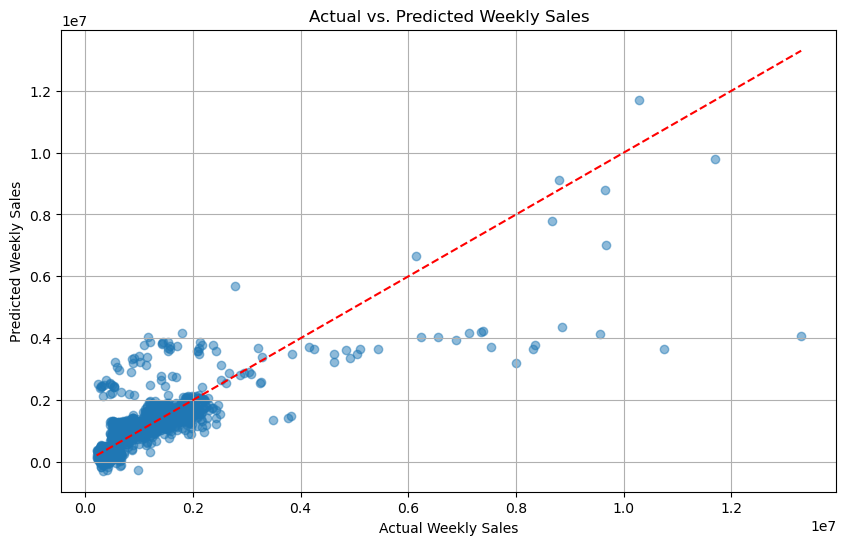

[-7.58785398e+03  2.34648524e+06  6.87373191e+03  8.38925027e+04
  1.82047481e+01 -2.61647006e+01  8.05226695e+01 -2.34820194e+01
  2.62514079e+00 -2.24167856e+03 -3.71478087e+04  1.39589337e+05
  9.14466906e+00 -1.08846071e+05  0.00000000e+00]


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedGroupKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np


X = merged_df.drop(columns=['Weekly_Sales', 'Month', 'WeekOfYear', 'Date', 'Holiday_Weight', 'Weighted_Weekly_Sales'])
y = merged_df['Weighted_Weekly_Sales']

label_encoder = LabelEncoder()
X['Type'] = label_encoder.fit_transform(X['Type'])
#X['Holiday'] = label_encoder.fit_transform(X['Holiday'])

linear_regression_model = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_regression_model.fit(x_train, y_train)
y_pred = linear_regression_model.predict(x_test)

mse =mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual vs. Predicted Weekly Sales")
plt.grid(True)
plt.show()


print(linear_regression_model.coef_)